# Fraud Detection System - Data Exploration

This notebook explores the transaction data to understand patterns and characteristics of fraudulent transactions.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations

sns.set_theme()  # This sets Seaborn's default styling
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data
df = pd.read_csv('../data/sample_transactions.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    1000 non-null   int64  
 1   timestamp         1000 non-null   object 
 2   customer_id       1000 non-null   int64  
 3   product_id        1000 non-null   int64  
 4   payment_method    1000 non-null   object 
 5   shipping_address  955 non-null    object 
 6   ip_address        960 non-null    object 
 7   device_id         951 non-null    object 
 8   amount            1000 non-null   float64
 9   is_fraud          1000 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 71.4+ KB


In [4]:
# Display first few rows
df.head()

,transaction_id,timestamp,customer_id,product_id,payment_method,shipping_address,ip_address,device_id,amount,is_fraud
0,0,2025-05-28 16:05:42,52,34,debit_card,"655 Main St, New York",28.236.25.135,Mac_8548,41.766696,False
1,1,2025-05-28 15:05:42,93,45,credit_card,"760 Broadway, Los Angeles",39.62.50.159,Linux_1448,10.000000,True
2,2,2025-05-28 14:05:42,15,6,debit_card,"229 Park Ave, New York",135.65.209.91,Mac_2904,31.241201,False
3,3,2025-05-28 13:05:42,72,37,credit_card,"693 State St, New York",NaN,Windows_2106,101.281707,False
4,4,2025-05-28 12:05:42,61,33,debit_card,"605 Market St, New York",96.246.104.118,Mac_4610,50.503918,False


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
shipping_address    45
ip_address          40
device_id           49
dtype: int64


In [6]:
# Basic statistics of numerical columns
df.describe()

,transaction_id,customer_id,product_id,amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,49.560000,25.194000,66.282512
std,288.819436,29.287679,13.979835,69.533473
min,0.000000,1.000000,1.000000,10.000000
25%,249.750000,24.000000,13.000000,36.791066
50%,499.500000,50.000000,26.000000,53.282749
75%,749.250000,75.000000,37.000000,76.798544
max,999.000000,99.000000,49.000000,1122.631877


Fraud Distribution (%):
is_fraud
False    95.0
True      5.0
Name: proportion, dtype: float64


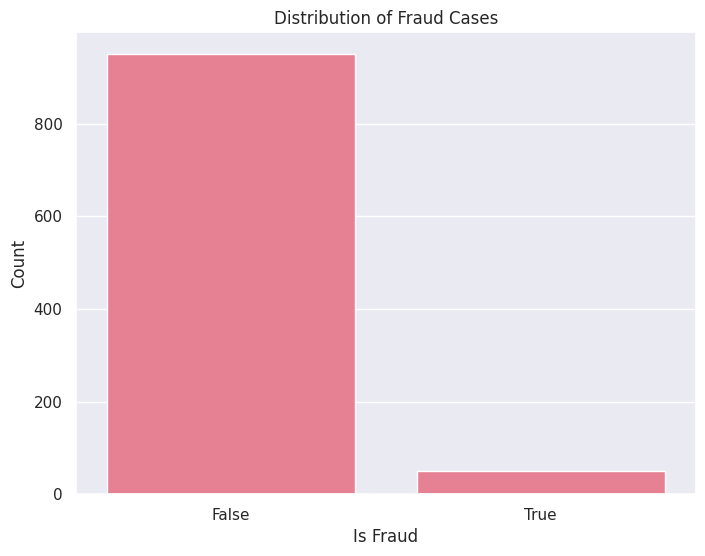

In [7]:
# Distribution of fraud cases
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100
print("Fraud Distribution (%):")
print(fraud_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title('Distribution of Fraud Cases')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

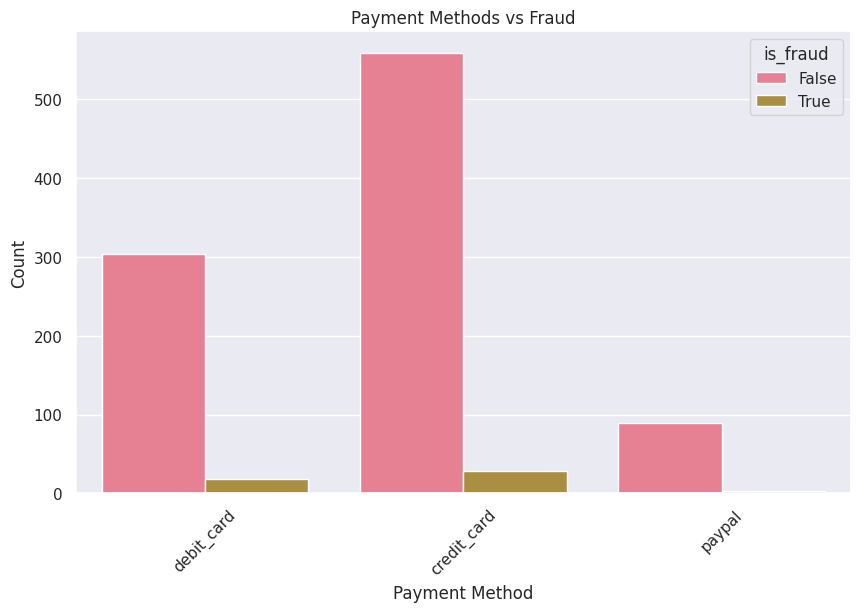

In [8]:
# Analyze payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method', hue='is_fraud')
plt.title('Payment Methods vs Fraud')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

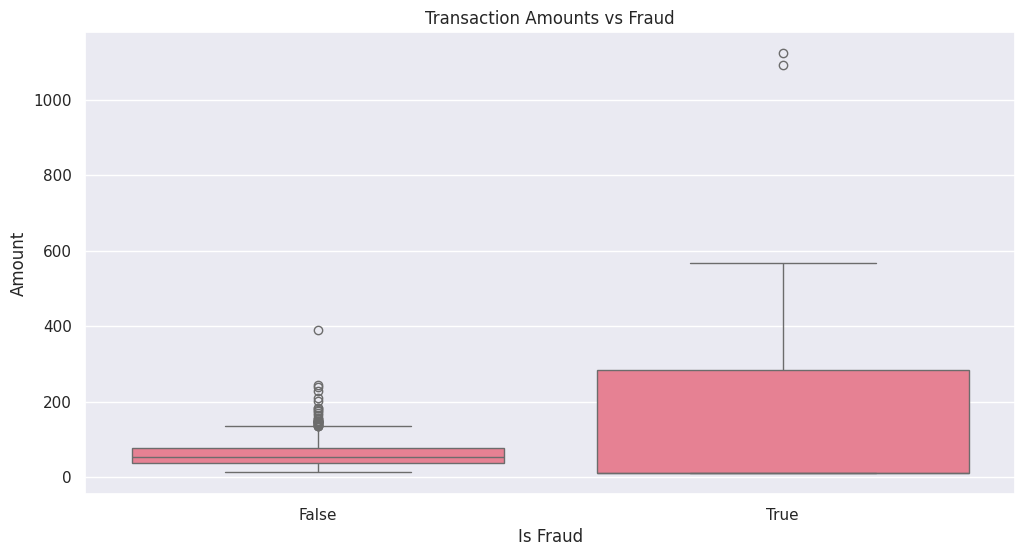

In [9]:
# Analyze transaction amounts
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_fraud', y='amount')
plt.title('Transaction Amounts vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

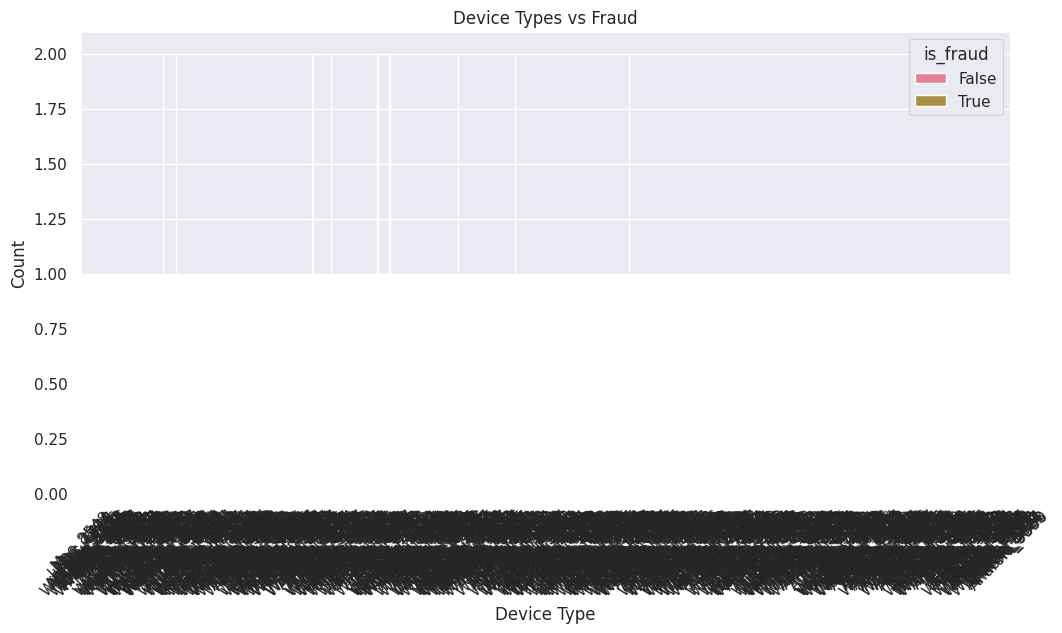

In [10]:
# Analyze device types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='device_id', hue='is_fraud')
plt.title('Device Types vs Fraud')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

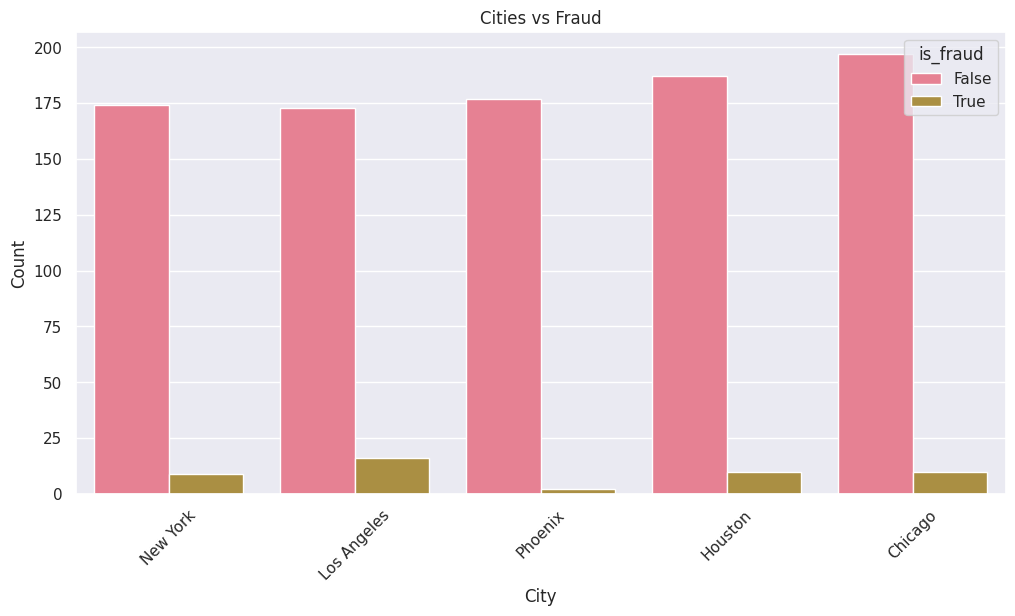

In [11]:
# Analyze locations
df['city'] = df['shipping_address'].str.split(',').str[1].str.strip()
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='city', hue='is_fraud')
plt.title('Cities vs Fraud')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

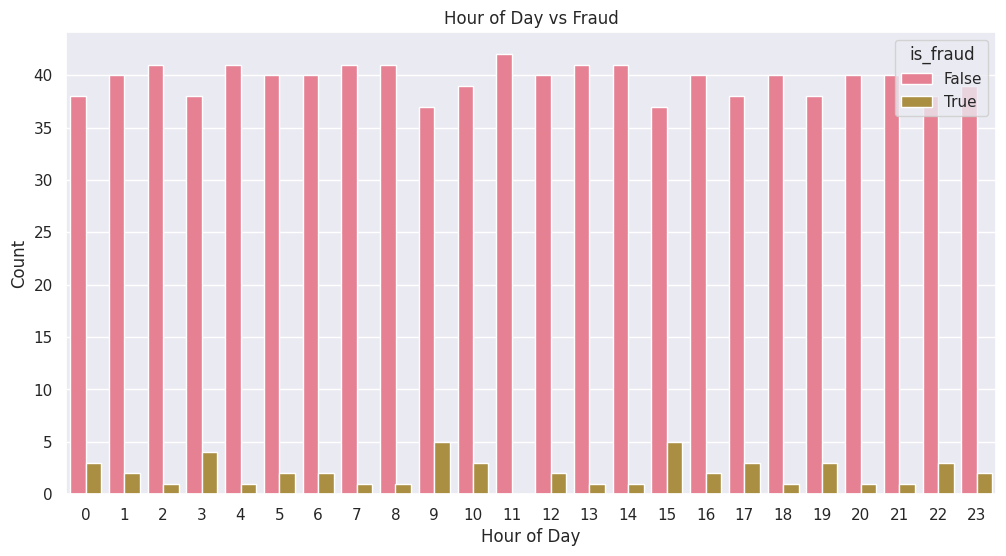

In [12]:
# Time-based analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='is_fraud')
plt.title('Hour of Day vs Fraud')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()